# Visualization and forecasting of the stock prices of AMZN and WMT
*  Andrew Yang on his podcast with Ethan Klein (https://www.youtube.com/watch?v=RwHo_JBUo4k) says that Walmart was akin to a military tank in the US retail space,crushing any competitor that came in it's way , but Amazon is like a UFO, hovering over it's competition and completely dominating the retail sector.
* A good measure for confidence in the growth of a company is it's stock price.
* We visualize the evolution of stock prices of AMZN and WMT from 2006 to 2018 and also employ various forecasting techniques to decide future prices

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stock-time-series-20050101-to-20171231/GS_2006-01-01_to_2018-01-01.csv
/kaggle/input/stock-time-series-20050101-to-20171231/UTX_2006-01-01_to_2018-01-01.csv
/kaggle/input/stock-time-series-20050101-to-20171231/HD_2006-01-01_to_2018-01-01.csv
/kaggle/input/stock-time-series-20050101-to-20171231/VZ_2006-01-01_to_2018-01-01.csv
/kaggle/input/stock-time-series-20050101-to-20171231/XOM_2006-01-01_to_2018-01-01.csv
/kaggle/input/stock-time-series-20050101-to-20171231/GOOGL_2006-01-01_to_2018-01-01.csv
/kaggle/input/stock-time-series-20050101-to-20171231/AAPL_2006-01-01_to_2018-01-01.csv
/kaggle/input/stock-time-series-20050101-to-20171231/MMM_2006-01-01_to_2018-01-01.csv
/kaggle/input/stock-time-series-20050101-to-20171231/MSFT_2006-01-01_to_2018-01-01.csv
/kaggle/input/stock-time-series-20050101-to-20171231/AABA_2006-01-01_to_2018-01-01.csv
/kaggle/input/stock-time-series-20050101-to-20171231/TRV_2006-01-01_to_2018-01-01.csv
/kaggle/input/stock-time-series-20050101-to-20171231

In [2]:
#Get the data and have a look at it

url_stocks='../input/stock-time-series-20050101-to-20171231/all_stocks_2006-01-01_to_2018-01-01.csv'
#url_stocks_recent='../input/stock-time-series-20050101-to-20171231/all_stocks_2017-01-01_to_2018-01-01.csv'


stocks_df=pd.read_csv(url_stocks,index_col='Date',parse_dates=[0])
#stocks_recent_df=pd.read_csv(url_stocks_recent,index_col='Date',parse_dates=[0])
print(stocks_df.head())


             Open   High    Low  Close   Volume Name
Date                                                
2006-01-03  77.76  79.35  77.24  79.11  3117200  MMM
2006-01-04  79.49  79.49  78.25  78.71  2558000  MMM
2006-01-05  78.41  78.65  77.56  77.99  2529500  MMM
2006-01-06  78.64  78.90  77.64  78.63  2479500  MMM
2006-01-09  78.50  79.83  78.46  79.02  1845600  MMM


In [3]:
#Slicing out the data we need
df=stocks_df[(stocks_df.Name=='AMZN') | (stocks_df.Name=='WMT')]
print(df.head())


             Open   High    Low  Close    Volume Name
Date                                                 
2006-01-03  46.36  46.66  45.57  46.23  23413900  WMT
2006-01-04  46.24  46.50  46.10  46.32  14090700  WMT
2006-01-05  46.00  46.40  45.29  45.69  20759200  WMT
2006-01-06  45.69  45.88  45.10  45.88  21135000  WMT
2006-01-09  45.89  46.15  45.56  45.71  14890700  WMT


In [4]:
#Checking for null values
print(df.info())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6039 entries, 2006-01-03 to 2017-12-29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    6038 non-null   float64
 1   High    6038 non-null   float64
 2   Low     6038 non-null   float64
 3   Close   6039 non-null   float64
 4   Volume  6039 non-null   int64  
 5   Name    6039 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 330.3+ KB
None


In [5]:
#Drop the single row with a Null value
df.dropna(axis=0,inplace=True)
print(df.isnull().sum())

Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [6]:
#Separting the amazon and walmart data 
amzn_df=df[df.Name=='AMZN']
wmt_df=df[df.Name=='WMT']

In [7]:
#Basic statistics of amazon data
print(amzn_df.describe())


              Open         High          Low        Close        Volume
count  3019.000000  3019.000000  3019.000000  3019.000000  3.019000e+03
mean    299.335310   302.371163   296.037695   299.376231  5.931712e+06
std     280.120547   281.826442   277.927134   279.980161  5.122034e+06
min      26.090000    26.300000    25.760000    26.070000  9.864350e+05
25%      81.175000    82.580000    79.725000    81.090000  3.137037e+06
50%     205.330000   208.000000   202.100000   205.440000  4.724100e+06
75%     375.570000   379.155000   373.000000   375.140000  7.135246e+06
max    1204.880000  1213.410000  1191.150000  1195.830000  1.044046e+08


In [8]:
#Basic statistics of walmart data
print(wmt_df.describe())

              Open         High          Low        Close        Volume
count  3019.000000  3019.000000  3019.000000  3019.000000  3.019000e+03
mean     62.250527    62.729801    61.805094    62.274419  1.246078e+07
std      12.735157    12.758600    12.722236    12.745512  7.574975e+06
min      42.390000    42.680000    42.090000    42.270000  1.712675e+06
25%      50.800000    51.350000    50.335000    50.870000  7.099182e+06
50%      58.990000    59.530000    58.570000    59.030000  1.035036e+07
75%      73.800000    74.150000    73.350000    73.760000  1.563728e+07
max      99.910000   100.130000    99.120000    99.620000  9.283877e+07


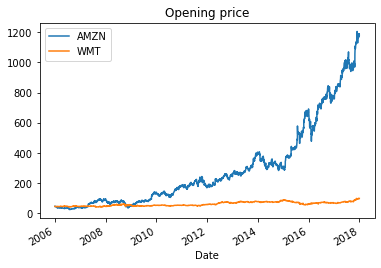

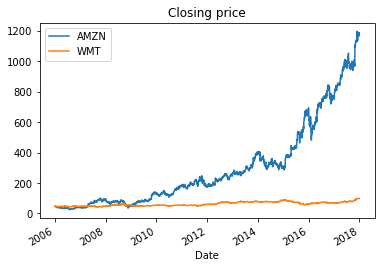

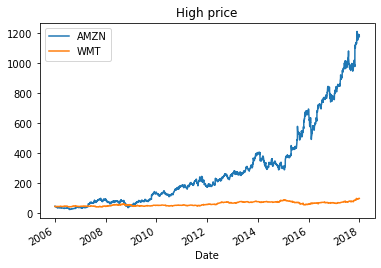

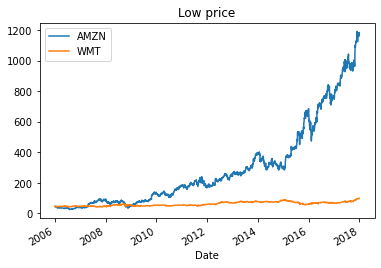

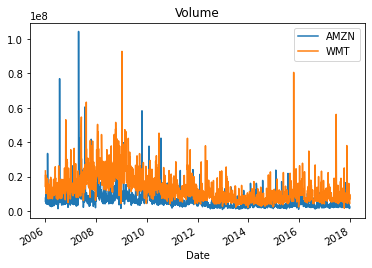

In [9]:
#Basic Plots
plt.title("Opening price")
amzn_df['Open'].plot(label='AMZN')
wmt_df['Open'].plot(label='WMT')
plt.legend()
plt.show()
plt.title("Closing price")
amzn_df['Close'].plot(label='AMZN')
wmt_df['Close'].plot(label='WMT')
plt.legend()
plt.show()
plt.title("High price")
amzn_df['High'].plot(label='AMZN')
wmt_df['High'].plot(label='WMT')
plt.legend()
plt.show()
plt.title("Low price")
amzn_df['Low'].plot(label='AMZN')
wmt_df['Low'].plot(label='WMT')
plt.legend()
plt.show()
plt.title("Volume")
amzn_df['Volume'].plot(label='AMZN')
wmt_df['Volume'].plot(label='WMT')
plt.legend()
plt.show()


* Notice the rapid growth of Amazon compared to the lack of growth of Walmart
* One can also notice the effect of the 2008 financial crisis as we can see a dip in the stock prices of AMZN and WMT then

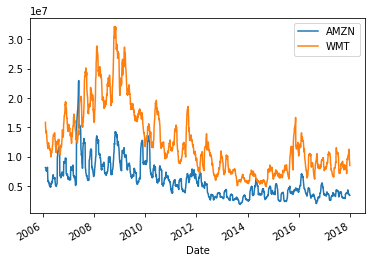

In [10]:
# We smoothen out the volume plot by taking rolling averages of 25 days
amzn_vol_mean=amzn_df['Volume'].rolling(window=25).mean()
wmt_vol_mean=wmt_df['Volume'].rolling(window=25).mean()


amzn_vol_mean.plot(label='AMZN')
wmt_vol_mean.plot(label='WMT')
plt.legend()
plt.show()



* High volume in 2008 of WMT stock might be because of investors selling due to fear of the market crashing

# Histograms and KDE plots

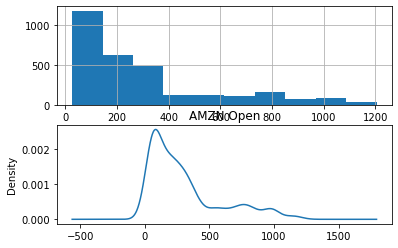

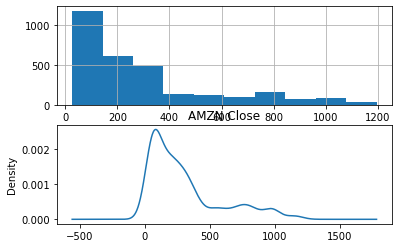

In [11]:
plt.figure(1)
plt.subplot(211)
amzn_df['Open'].hist()
plt.subplot(212)
amzn_df['Open'].plot(kind='kde')
plt.title("AMZN Open")
plt.show()

plt.figure(1)
plt.subplot(211)
amzn_df['Close'].hist()
plt.subplot(212)
amzn_df['Close'].plot(kind='kde')
plt.title("AMZN Close")
plt.show()

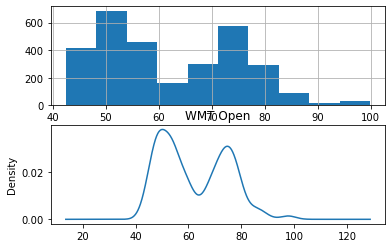

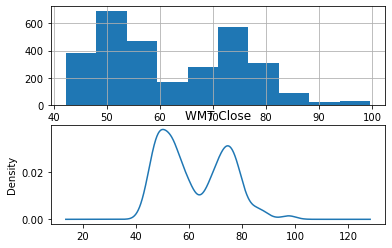

In [12]:
plt.figure(1)
plt.subplot(211)
wmt_df['Open'].hist()
plt.subplot(212)
wmt_df['Open'].plot(kind='kde')
plt.title("WMT Open")
plt.show()
plt.figure(1)
plt.subplot(211)
wmt_df['Close'].hist()
plt.subplot(212)
wmt_df['Close'].plot(kind='kde')
plt.title("WMT Close")
plt.show()

* Looks like a double gaussian distribution

# **Yearly and Monthly trends**

We plot yearly and monthly trends of the opening amzn and wmt stocks

In [13]:
#Get non indexed version of data
data = pd.read_csv(url_stocks,parse_dates=[0])
data['Date'] = pd.to_datetime(data['Date'])
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data.head()

,Date,Open,High,Low,Close,Volume,Name,year,month
0,2006-01-03,77.76,79.35,77.24,79.11,3117200,MMM,2006,1
1,2006-01-04,79.49,79.49,78.25,78.71,2558000,MMM,2006,1
2,2006-01-05,78.41,78.65,77.56,77.99,2529500,MMM,2006,1
3,2006-01-06,78.64,78.90,77.64,78.63,2479500,MMM,2006,1
4,2006-01-09,78.50,79.83,78.46,79.02,1845600,MMM,2006,1


In [14]:
amzn_data=data[data.Name == 'AMZN']
wmt_data=data[data.Name == 'WMT']

Text(0, 0.5, 'Open price of AMZN')

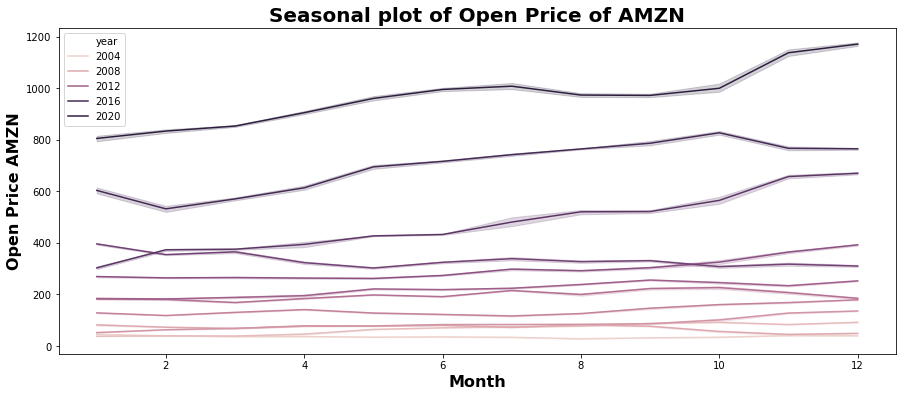

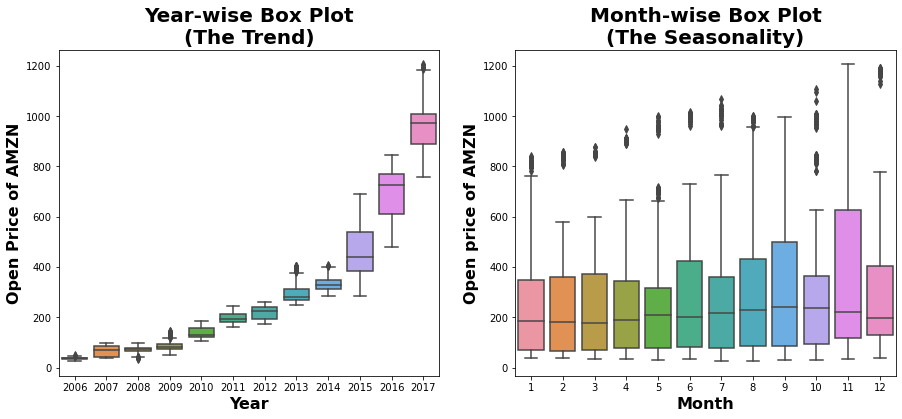

In [15]:
import seaborn as sns
variable = 'Open'
fig, ax = plt.subplots(figsize=(15, 6))
d=amzn_data
sns.lineplot(d['month'], d[variable], hue=d['year'])
ax.set_title('Seasonal plot of Open Price of AMZN', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Month', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Open Price AMZN', fontsize = 16, fontdict=dict(weight='bold'))


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

sns.boxplot(d['year'], d[variable], ax=ax[0])
ax[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax[0].set_xlabel('Year', fontsize = 16, fontdict=dict(weight='bold'))
ax[0].set_ylabel('Open Price of AMZN', fontsize = 16, fontdict=dict(weight='bold'))

sns.boxplot(d['month'], d[variable], ax=ax[1])
ax[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax[1].set_xlabel('Month', fontsize = 16, fontdict=dict(weight='bold'))
ax[1].set_ylabel('Open price of AMZN', fontsize = 16, fontdict=dict(weight='bold'))


* From the first plot it is clear that Amazon's growth is actually acclerating

Text(0, 0.5, 'Open price of WMT')

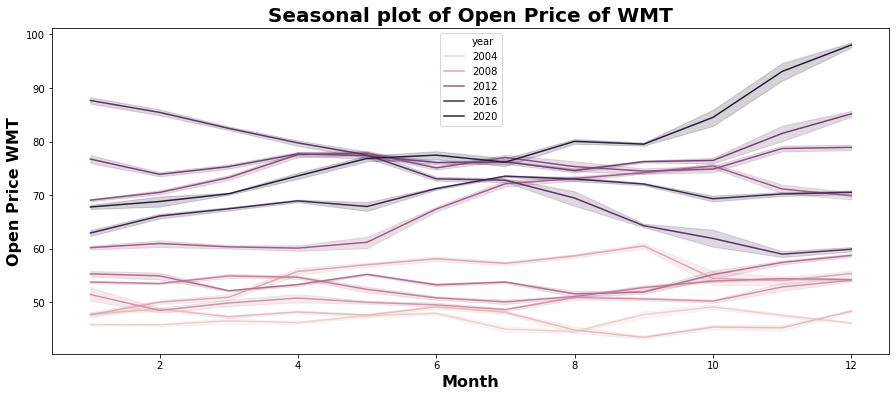

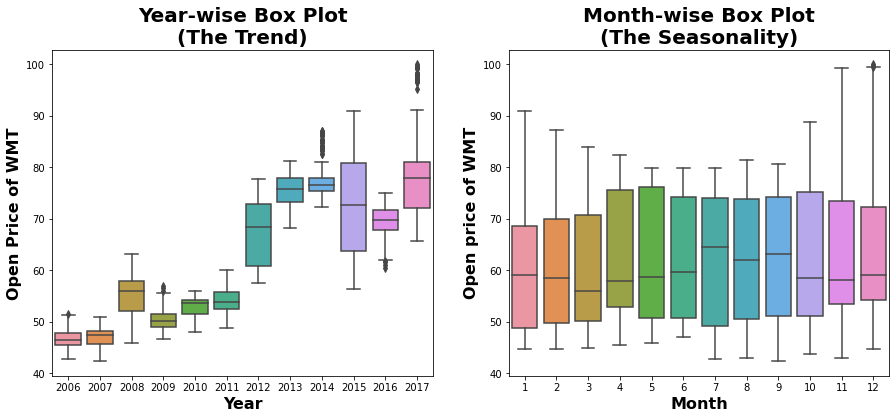

In [16]:
variable = 'Open'
fig, ax = plt.subplots(figsize=(15, 6))
d=wmt_data
sns.lineplot(d['month'], d[variable], hue=d['year'])
ax.set_title('Seasonal plot of Open Price of WMT', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Month', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Open Price WMT', fontsize = 16, fontdict=dict(weight='bold'))


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

sns.boxplot(d['year'], d[variable], ax=ax[0])
ax[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax[0].set_xlabel('Year', fontsize = 16, fontdict=dict(weight='bold'))
ax[0].set_ylabel('Open Price of WMT', fontsize = 16, fontdict=dict(weight='bold'))

sns.boxplot(d['month'], d[variable], ax=ax[1])
ax[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax[1].set_xlabel('Month', fontsize = 16, fontdict=dict(weight='bold'))
ax[1].set_ylabel('Open price of WMT', fontsize = 16, fontdict=dict(weight='bold'))

* WMT stock seems to slow down as time progresses, curve in the yearly box plot looks like a sigmoid function

# Forecasting prices of amazon and walmart stock

In [17]:
#We try to predict the opening day prices
amzn_stock=amzn_df['Open']
wmt_stock=wmt_df['Open']

**Naive Models**

* Occam's Razor suggests that our model should be as simple as it can be. Therefore we first build simple models and evaluate on those.
* The first model we use is the persistence model predicts that the stock price of tomorrow is the same as the price of today
* All the other models we work with must atleast be as accurate as this model.

In [18]:
#Divide into testing and training sets
PERCENTAGE_TRAIN=0.8
train_size=int(PERCENTAGE_TRAIN*amzn_stock.shape[0])
print(train_size)

#We train the first PERCENTAGE_TRAIN% of our entries and predict the remaining


2415


In [19]:
#Shifting by prices by one day
amzn_shifted=amzn_stock.shift(periods=1)
wmt_shifted=wmt_stock.shift(periods=1)
print(amzn_shifted.head())

Date
2006-01-03      NaN
2006-01-04    47.47
2006-01-05    47.48
2006-01-06    47.16
2006-01-09    47.97
Name: Open, dtype: float64


In [20]:
amzn_train=amzn_stock[:train_size]
amzn_test=amzn_stock[train_size:]
wmt_train=wmt_stock[:train_size]
wmt_test=wmt_stock[train_size:]
test_size=amzn_test.size
print(amzn_test.size)

604


In [21]:
#RootMeanSqrError in baseline prediction
# Our predicted value at time t is just the known value at time t-1
from sklearn.metrics import mean_squared_error
amzn_naive_error=mean_squared_error(amzn_stock[train_size:],amzn_shifted[train_size:],squared=False)
wmt_naive_error=mean_squared_error(wmt_stock[train_size:],wmt_shifted[train_size:],squared=False)
print(amzn_naive_error,wmt_naive_error)

12.23687188824299 0.9099709805430408


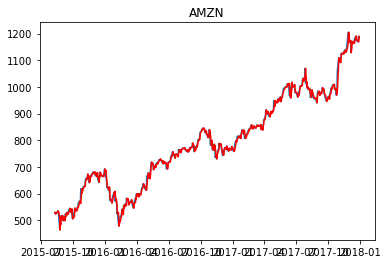

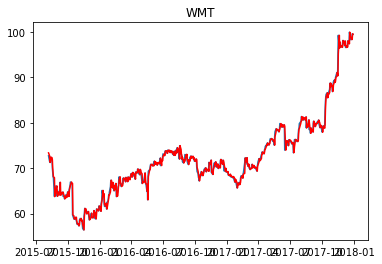

In [22]:
plt.plot(amzn_stock[train_size:],label="True")
plt.plot(amzn_shifted[train_size:],label="Predicted",color="red")
plt.title("AMZN")
plt.show()

plt.plot(wmt_stock[train_size:],label="True")
plt.plot(wmt_shifted[train_size:],label="Predicted",color="red")
plt.title("WMT")
plt.show()

* Notice how accurate this naive model itself is for the datasets.
* It is not so accurate for AMZN as AMZN has an increasing trend

# Rolling Averages Model

* We just predict that the present value of the stock is the mean of the last k days
* Choosing k is the difficult part, here we assume 2 different values of k and check our accuracy

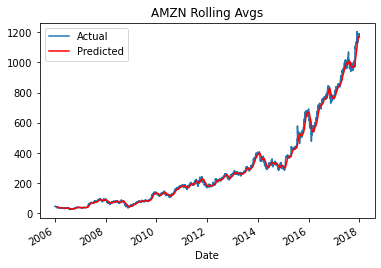

Error for k=  25  AMZN is  18.575973468425


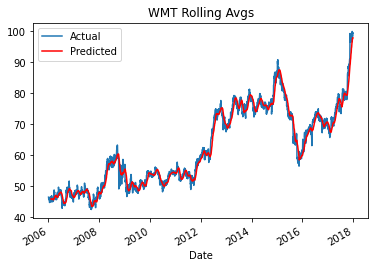

Error for k=  25  WMT is  1.817652638936186


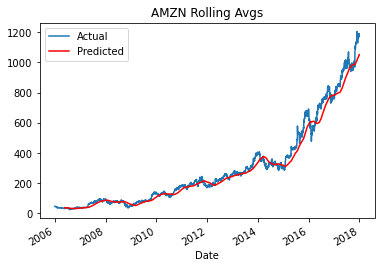

Error for k=  100  AMZN is  40.93326247035012


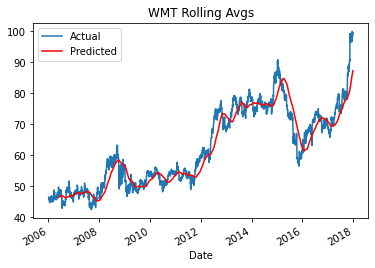

Error for k=  100  WMT is  3.818113887157255


In [23]:
k=25
amzn_mean=amzn_stock.rolling(window=k).mean()
wmt_mean=wmt_stock.rolling(window=k).mean()

amzn_stock.plot(label='Actual')
amzn_mean.plot(label='Predicted',color='red')
plt.title("AMZN Rolling Avgs")
plt.legend()
plt.show()

print("Error for k= ",k," AMZN is ", mean_squared_error(amzn_mean[k:],amzn_stock[k:],squared=False))



wmt_stock.plot(label='Actual')
wmt_mean.plot(label='Predicted',color='red')
plt.title("WMT Rolling Avgs")
plt.legend()
plt.show()

print("Error for k= ",k," WMT is ", mean_squared_error(wmt_mean[k:],wmt_stock[k:],squared=False))



k=100
amzn_mean=amzn_stock.rolling(window=k).mean()
wmt_mean=wmt_stock.rolling(window=k).mean()

amzn_stock.plot(label='Actual')
amzn_mean.plot(label='Predicted',color='red')
plt.title("AMZN Rolling Avgs")
plt.legend()
plt.show()

print("Error for k= ",k," AMZN is ", mean_squared_error(amzn_mean[k:],amzn_stock[k:],squared=False))



wmt_stock.plot(label='Actual')
wmt_mean.plot(label='Predicted',color='red')
plt.title("WMT Rolling Avgs")
plt.legend()
plt.show()

print("Error for k= ",k," WMT is ", mean_squared_error(wmt_mean[k:],wmt_stock[k:],squared=False))


In [24]:
# Rolling Medians

Same principle as before, just replace the word mean with median

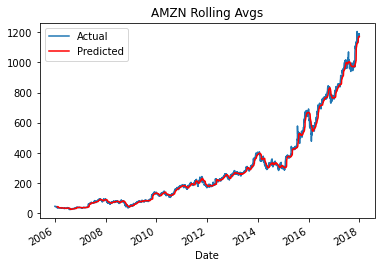

Error for k=  25  AMZN is  19.718058584336777


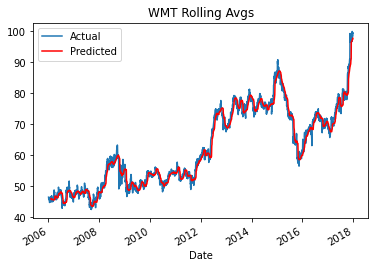

Error for k=  25  WMT is  1.9410512856491902


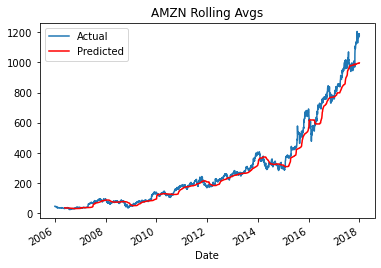

Error for k=  100  AMZN is  44.13876365506015


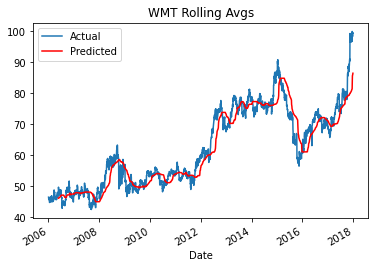

Error for k=  100  WMT is  4.101689081714488


In [25]:
k=25
amzn_mean=amzn_stock.rolling(window=k).median()
wmt_mean=wmt_stock.rolling(window=k).median()

amzn_stock.plot(label='Actual')
amzn_mean.plot(label='Predicted',color='red')
plt.title("AMZN Rolling Avgs")
plt.legend()
plt.show()

print("Error for k= ",k," AMZN is ", mean_squared_error(amzn_mean[k:],amzn_stock[k:],squared=False))



wmt_stock.plot(label='Actual')
wmt_mean.plot(label='Predicted',color='red')
plt.title("WMT Rolling Avgs")
plt.legend()
plt.show()

print("Error for k= ",k," WMT is ", mean_squared_error(wmt_mean[k:],wmt_stock[k:],squared=False))



k=100
amzn_mean=amzn_stock.rolling(window=k).median()
wmt_mean=wmt_stock.rolling(window=k).median()

amzn_stock.plot(label='Actual')
amzn_mean.plot(label='Predicted',color='red')
plt.title("AMZN Rolling Avgs")
plt.legend()
plt.show()

print("Error for k= ",k," AMZN is ", mean_squared_error(amzn_mean[k:],amzn_stock[k:],squared=False))



wmt_stock.plot(label='Actual')
wmt_mean.plot(label='Predicted',color='red')
plt.title("WMT Rolling Avgs")
plt.legend()
plt.show()

print("Error for k= ",k," WMT is ", mean_squared_error(wmt_mean[k:],wmt_stock[k:],squared=False))


 **Since we achieved an RMSE error of less than for the WMT data using just the persistence model, we try to use sophisticated methods of prediction only for the AMZN dataset.**

# AutoRegression Model

* Think of the stock price at time t,t+1,t+2,...t+n to be a function of the price at times t-1,t-2,...t-k where k is a parameter we have to optimize over.
* The features will therefore be X_t-1,X_t-2,,,X_t-k and the output of X_t+1,X_t+2,...X_t+n and we need to extract this carefully using the pandas shift() function
* AutoRegression model generalizes the persistence model for prediction

In [26]:
#Helper function to extract the needed data
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    """
    Frame a time series as a supervised learning dataset.
    Arguments:
        data: Sequence of observations as a list or NumPy array.
        n_in: Number of lag observations as input (X).
        n_out: Number of observations as output (y).
        dropnan: Boolean whether or not to drop rows with NaN values.
    Returns:
        Pandas DataFrame of series framed for supervised learning.
    """
    n_vars = 1 if type(data) is list else data.shape[0]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [(f"var_t-{i}") for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [(f'var_t') for j in range(n_vars)]
        else:
            names += [(f'var_t+{i}') for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

For choosing the no of lag variables we look at a partial autocorrelation plot

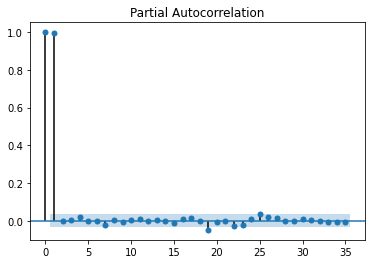

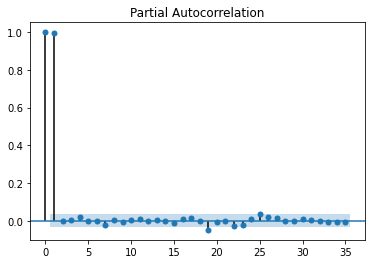

In [27]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(amzn_stock.values)

See the high degree of correlation with the previous value. So we set LAG_VARIABLES for AMZN as 1

In [28]:
amzn_values = list(amzn_stock.values)
# We wish to do apply the rolling validation technique, hence the no of outputs will be 1
LAG_VARIABLES=1
amzn_supervised_data = series_to_supervised(amzn_values,LAG_VARIABLES,1)

print(amzn_supervised_data.shape)

(3018, 2)


In [29]:
#Split into train and test
TRAIN_PERCENTAGE=0.8
train_size=int(TRAIN_PERCENTAGE*amzn_supervised_data.shape[0])
print(train_size)
amzn_train_lin=amzn_supervised_data[:train_size]
amzn_test_lin=amzn_supervised_data[train_size:]
#print(amzn_test_lin)

train_price=amzn_train_lin['var_t']
amzn_train_data=amzn_train_lin.drop(columns='var_t')
#print(amzn_train_data)

test_price=amzn_test_lin['var_t']
#print(test_price)
amzn_test_data=amzn_test_lin.drop(columns='var_t')
print(amzn_test_data)

2414
      var_t-1
2415   529.16
2416   528.52
2417   523.65
2418   523.75
2419   527.37
...       ...
3014  1175.90
3015  1172.08
3016  1168.36
3017  1179.91
3018  1189.00

[604 rows x 1 columns]


In [30]:
#Linear Model
from sklearn.linear_model import LinearRegression 
linear_model = LinearRegression()

**Rolling Forecasting- We predict the price at day t assuming we know the history upto day t-1, for the last 20% of the data**

In [31]:
print(amzn_train_data)
type(amzn_train_data)

      var_t-1
1       47.47
2       47.48
3       47.16
4       47.97
5       46.55
...       ...
2410   539.09
2411   537.45
2412   529.69
2413   538.80
2414   539.30

[2414 rows x 1 columns]


pandas.core.frame.DataFrame

In [32]:
history = amzn_train_data
#print(history)
y_pred = []
y_test = test_price.values
train_price=train_price.values
train_price=list(train_price)

for t in range(len(y_test)):
    model = linear_model
    model_fit = model.fit(history,train_price) #We make the model at every timestep
    x_val=[amzn_test_data.iloc[t,:]]
    yhat=model_fit.predict(x_val)
    
    history=history.append(x_val[0])
    y_pred.append(yhat)
    obs=y_test[t]
    train_price.append(obs)


error=mean_squared_error(y_pred,y_test,squared=False)
print("MSE is ",error)

MSE is  12.214009986361614


Naive persistence gave an mse square of 12.236,we observe an increase of the score by 0.02, thus our new model does 1.36% times better than the old model

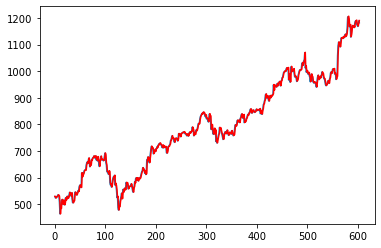

In [33]:
plt.plot(y_test)
plt.plot(y_pred,color='red')
plt.show()

# ARIMA model

* We now build the Arima model in order to predict the stock price. This combines our previous methods of forecasting.
* The Arima model is made of the following 3 components-:
1. AutoRegressive (AR) with parameter 'p' - 'p' must be chosen such that there is a high value of absolute correlation b/w today's and the past p days stock price
2. Integrated (I) with parameter 'd' - 'd' is chosen such that after taking the dth order difference((X_t-X_t-1)-(X_t-1 - X_t-2)-...-(X_t-d+1-X_t-d)) we must have stationary values as t varies
3. Rolling Averages with parameter 'q' - q must be chosen such that the qth moving average model must 'approximate' our model

* By looking at the pacf plot for the AR model we already know that the p value must be 1

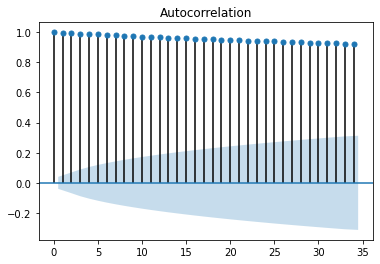

In [34]:
from statsmodels.graphics.tsaplots import plot_acf

#plot_acf helps finding q
plot_acf(amzn_train)
plt.show()

We can set q value as 0/1 or 2

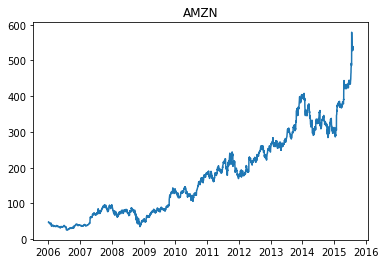

In [35]:
plt.plot(amzn_train)
plt.title("AMZN")
plt.show()


* We plot the graph in order to find out the trend.
* Since,Amazon stock is increasing rapidly it's d value will be 1/2

In [36]:
#amazon Arima p =1 q=0/1/2 d=1/2
from statsmodels.tsa.arima_model import ARIMA

# Hyperparameter Tuning

We do a rolling forecast in which we apply the ARIMA model on day d containing all the information uptil days d-1. We then calculate the error in prediction on day d given data uptil d-1 and then sum it all up to get the final error

In [37]:
#forecasting amzn stock
history=[x for x in amzn_train]
y_pred=[]
y_test=amzn_test.values
hyperparameters=(1,1,0)
for t in range(len(amzn_test)):
    model=ARIMA(history,order=hyperparameters)
    model_fit=model.fit(disp=0)
    output=model_fit.forecast()
    yhat=output[0]
    y_pred.append(yhat)
    obs=y_test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))



predicted=530.272107, expected=528.520000
predicted=528.792967, expected=523.650000
predicted=524.292086, expected=523.750000
predicted=523.955578, expected=527.370000
predicted=527.268165, expected=528.250000
predicted=528.389009, expected=531.290000
predicted=531.240953, expected=535.040000
predicted=534.931056, expected=533.740000
predicted=534.072153, expected=530.390000
predicted=530.899627, expected=507.360000
predicted=509.541747, expected=463.580000
predicted=466.611728, expected=487.490000
predicted=485.719912, expected=484.020000
predicted=484.502774, expected=513.710000
predicted=511.395874, expected=517.500000
predicted=517.399749, expected=516.440000
predicted=516.735422, expected=499.140000
predicted=500.748130, expected=505.090000
predicted=504.801572, expected=514.500000
predicted=513.938800, expected=497.650000
predicted=499.273025, expected=508.690000
predicted=507.932142, expected=524.000000
predicted=522.923382, expected=515.150000
predicted=516.121990, expected=521

/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=800.179766, expected=814.320000
predicted=813.743989, expected=815.700000
predicted=815.908469, expected=809.500000
predicted=810.174817, expected=810.000000
predicted=810.260442, expected=815.280000
predicted=815.246772, expected=806.800000
predicted=807.617971, expected=822.000000
predicted=821.330929, expected=825.790000
predicted=825.849076, expected=835.530000
predicted=835.221943, expected=839.000000
predicted=839.086200, expected=833.000000
predicted=833.673624, expected=823.750000
predicted=824.616777, expected=829.210000
predicted=829.168415, expected=836.590000
predicted=836.434444, expected=806.720000
predicted=808.916903, expected=809.800000
predicted=809.893182, expected=809.310000
predicted=809.631796, expected=812.690000
predicted=812.764721, expected=821.600000
predicted=821.325545, expected=823.820000
predicted=823.974092, expected=831.620000
predicted=831.422720, expected=837.000000
predicted=836.960486, expected=834.000000
predicted=834.488715, expected=841

/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=999.866473, expected=998.700000
predicted=999.000356, expected=1002.230000
predicted=1002.307134, expected=1002.540000
predicted=1002.872477, expected=1008.500000
predicted=1008.386557, expected=990.690000
predicted=992.470408, expected=978.550000
predicted=979.843837, expected=979.000000
predicted=979.312273, expected=980.120000
predicted=980.380395, expected=972.790000
predicted=973.705999, expected=961.530000
predicted=962.738580, expected=964.660000
predicted=964.759332, expected=969.550000
predicted=969.515499, expected=985.000000
predicted=984.165222, expected=993.000000
predicted=992.747486, expected=1000.650000
predicted=1000.430442, expected=1004.620000
predicted=1004.678393, expected=1002.400000
predicted=1002.919623, expected=1004.690000
predicted=1004.873343, expected=1006.000000
predicted=1006.256976, expected=1025.000000
predicted=1023.944931, expected=1031.590000
predicted=1031.470322, expected=1021.280000
predicted=1022.401647, expected=1028.340000
predicted=1

In [38]:
error=mean_squared_error(y_pred,y_test,squared=False)
print("MSE is ",error)

MSE is  12.24725224683349


(1,1,0) gives worse than persisistence

In [39]:
#forecasting amzn stock
history=[x for x in amzn_train]
y_pred=[]
y_test=amzn_test.values
hyperparameters=(1,1,1)
for t in range(len(amzn_test)):
    model=ARIMA(history,order=hyperparameters)
    model_fit=model.fit(disp=0)
    output=model_fit.forecast()
    yhat=output[0]
    y_pred.append(yhat)
    obs=y_test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))


predicted=529.835210, expected=528.520000
predicted=528.523667, expected=523.650000
predicted=524.318157, expected=523.750000
predicted=523.694244, expected=527.370000
predicted=527.462831, expected=528.250000
predicted=528.457682, expected=531.290000
predicted=531.283007, expected=535.040000
predicted=535.104348, expected=533.740000
predicted=534.122641, expected=530.390000
predicted=530.739010, expected=507.360000
predicted=509.035792, expected=463.580000
predicted=465.044264, expected=487.490000
predicted=484.921625, expected=484.020000
predicted=485.899799, expected=513.710000
predicted=510.513772, expected=517.500000
predicted=519.513883, expected=516.440000
predicted=515.639528, expected=499.140000
predicted=501.388507, expected=505.090000
predicted=503.415165, expected=514.500000
predicted=515.259822, expected=497.650000
predicted=498.869623, expected=508.690000
predicted=507.413779, expected=524.000000
predicted=523.968775, expected=515.150000
predicted=516.125699, expected=521

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:220: RuntimeWarning: divide by zero encountered in true_divide
  Z_mat, R_mat, T_mat)


predicted=801.376363, expected=818.000000
predicted=817.789486, expected=828.260000
predicted=827.958903, expected=832.610000
predicted=832.836266, expected=836.000000
predicted=835.766644, expected=840.910000
predicted=841.621271, expected=838.000000
predicted=838.526416, expected=843.700000
predicted=843.582535, expected=845.790000
predicted=846.329710, expected=843.250000
predicted=843.466749, expected=841.020000
predicted=841.474817, expected=834.000000
predicted=834.457662, expected=829.000000
predicted=829.369999, expected=835.080000
predicted=835.080601, expected=821.500000
predicted=822.581450, expected=822.110000
predicted=821.760042, expected=820.400000
predicted=821.263538, expected=813.990000
predicted=814.096988, expected=809.360000
predicted=809.988548, expected=824.950000
predicted=824.821434, expected=839.300000
predicted=839.707610, expected=832.760000
predicted=833.060144, expected=831.240000
predicted=831.548544, expected=782.000000
predicted=784.564000, expected=781

In [40]:
error=mean_squared_error(y_pred,y_test,squared=False)
print("MSE for",hyperparameters, "is ",error)

MSE for (1, 1, 1) is  12.288869781584836


This is also worse than persistence

In [41]:
#forecasting amzn stock
history=[x for x in amzn_train]
y_pred=[]
y_test=amzn_test.values
hyperparameters=(1,2,0)
for t in range(len(amzn_test)):
    model=ARIMA(history,order=hyperparameters)
    model_fit=model.fit(disp=0)
    output=model_fit.forecast()
    yhat=output[0]
    y_pred.append(yhat)
    obs=y_test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))


predicted=524.824619, expected=528.520000
predicted=522.687848, expected=523.650000
predicted=521.088322, expected=523.750000
predicted=521.133901, expected=527.370000
predicted=529.069600, expected=528.250000
predicted=530.627414, expected=531.290000
predicted=533.152030, expected=535.040000
predicted=538.404626, expected=533.740000
predicted=535.197957, expected=530.390000
predicted=528.157356, expected=507.360000
predicted=495.054289, expected=463.580000
predicted=430.979537, expected=487.490000
predicted=474.146066, expected=484.020000
predicted=495.465626, expected=513.710000
predicted=525.210588, expected=517.500000
predicted=535.570414, expected=516.440000
predicted=518.032828, expected=499.140000
predicted=490.701430, expected=505.090000
predicted=498.296141, expected=514.500000
predicted=522.029864, expected=497.650000
predicted=495.123174, expected=508.690000
predicted=504.431031, expected=524.000000
predicted=536.995638, expected=515.150000
predicted=519.463168, expected=521

/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=676.826486, expected=680.800000
predicted=683.922795, expected=675.900000
predicted=676.806812, expected=673.750000
predicted=670.106215, expected=681.000000
predicted=683.154881, expected=679.440000
predicted=682.660902, expected=666.000000
predicted=658.987299, expected=674.740000
predicted=671.440461, expected=663.130000
predicted=662.590985, expected=678.000000
predicted=678.404806, expected=665.590000
predicted=668.149955, expected=651.230000
predicted=637.925432, expected=641.750000
predicted=629.600614, expected=665.030000
predicted=670.483616, expected=663.560000
predicted=675.607195, expected=680.000000
predicted=686.654464, expected=668.650000
predicted=672.555060, expected=668.500000
predicted=662.207791, expected=666.830000
predicted=665.992071, expected=666.500000
predicted=665.435469, expected=663.350000
predicted=661.743694, expected=665.560000
predicted=664.833347, expected=677.980000
predicted=684.816101, expected=691.890000
predicted=704.993360, expected=686

/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=746.139645, expected=742.710000
predicted=740.278733, expected=737.970000
predicted=733.715669, expected=745.980000
predicted=747.075530, expected=765.000000
predicted=778.069673, expected=759.870000
predicted=767.839132, expected=763.810000
predicted=762.836335, expected=757.060000
predicted=756.103204, expected=753.700000
predicted=748.500227, expected=764.810000
predicted=768.085857, expected=766.810000
predicted=773.748408, expected=767.390000
predicted=768.739532, expected=769.800000
predicted=771.220231, expected=769.940000
predicted=771.309720, expected=768.460000
predicted=767.856647, expected=771.900000
predicted=772.677057, expected=768.620000
predicted=768.978871, expected=764.410000
predicted=760.701325, expected=764.000000
predicted=761.531653, expected=761.900000
predicted=760.714182, expected=757.500000
predicted=754.343177, expected=763.310000
predicted=763.592681, expected=763.000000
predicted=766.005266, expected=756.000000
predicted=752.618019, expected=760

/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=954.985727, expected=960.110000
predicted=965.969989, expected=964.000000
predicted=970.270253, expected=958.000000
predicted=957.389448, expected=954.210000
predicted=949.213331, expected=970.000000
predicted=975.127961, expected=975.640000
predicted=986.813981, expected=993.240000
predicted=1004.329050, expected=996.670000
predicted=1007.831683, expected=991.270000
predicted=990.676363, expected=996.810000
predicted=996.392440, expected=1007.000000
predicted=1014.663881, expected=1008.440000
predicted=1014.645283, expected=1005.590000
predicted=1005.073269, expected=1009.270000
predicted=1009.397790, expected=990.000000
predicted=983.222144, expected=993.530000
predicted=984.621517, expected=986.730000
predicted=985.561045, expected=969.000000
predicted=957.215722, expected=978.000000
predicted=972.419278, expected=980.330000
predicted=986.295614, expected=1058.140000
predicted=1094.730134, expected=1095.010000
predicted=1154.275539, expected=1109.000000
predicted=1135.3504

In [42]:
error=mean_squared_error(y_pred,y_test,squared=False)
print("MSE is ",error)

MSE is  14.914630223382371


This too is far worse than persistence

* The ARIMA model for p values in {1} d in {1,2} and q in {0,1,2} all performed worse than the naive model


* So the best model we have for forecasting AMZN prices is the AR model with one lag parameter. 
* This could have informally been seen by noticing the high degree of correlation b/w X_t and X_t-1 in the PACF plot. 

# Conclusion
* In this kernel, by means of visualization we realised how the growth of AMZN stock evolved over time compared to WMT stock
* We had a look at various models of forecasting stock prices namely naive,rolling mean/median,AR and ARIMA
* We concluded that for this dataset the AR model did best, but only showed an increase of 1.2% in performance wrt to the naive model

# References used
* https://machinelearningmastery.com/ The section on time series on this website